In [40]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [41]:
IMAGE_SIZE = 256
CHANNELS = 3

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'datasett/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 774 images belonging to 5 classes.


In [43]:
train_generator.class_indices

{'Healthy': 0, 'Leaf Spot': 1, 'Other': 2, 'Powdery Mildew': 3, 'Wilts': 4}

In [44]:
class_names = list(train_generator.class_indices.keys())
class_names

['Healthy', 'Leaf Spot', 'Other', 'Powdery Mildew', 'Wilts']

In [45]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.24996522 0.30486718 0.11271032]
  [0.2497631  0.30466506 0.11250819]
  [0.24956097 0.30446294 0.11230606]
  ...
  [0.79131216 0.79131216 0.79131216]
  [0.79897964 0.79897964 0.79897964]
  [0.8021696  0.8021696  0.8021696 ]]

 [[0.27418977 0.32619056 0.14273721]
  [0.27257276 0.3247757  0.14071594]
  [0.27095574 0.3233608  0.13869469]
  ...
  [0.7919186  0.7919186  0.7919186 ]
  [0.7987775  0.7987775  0.7987775 ]
  [0.80338234 0.80338234 0.80338234]]

 [[0.27076912 0.3304374  0.14714926]
  [0.27157763 0.3306395  0.14755352]
  [0.27238613 0.33084166 0.14795777]
  ...
  [0.79252493 0.79252493 0.79252493]
  [0.7985754  0.7985754  0.7985754 ]
  [0.8045951  0.8045951  0.8045951 ]]

 ...

 [[0.6560571  0.6560571  0.6560571 ]
  [0.6720129  0.6720129  0.6720129 ]
  [0.64317954 0.64317954 0.64317954]
  ...
  [0.7411765  0.7411765  0.7411765 ]
  [0.7411765  0.7411765  0.7411765 ]
  [0.7411765  0.7411765  0.7411765 ]]

 [[0.6586848  0.6586848  0.6586848 ]
  [0.67181075 0.67181075 0.67181075]


In [46]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 86 images belonging to 4 classes.


In [47]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 181 images belonging to 4 classes.


In [48]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.91025704 0.91919374 0.9152722 ]
  [0.90629137 0.91423666 0.9103151 ]
  [0.9067716  0.91461474 0.91069317]
  ...
  [0.87644553 0.8646808  0.845073  ]
  [0.88472843 0.8729637  0.8533559 ]
  [0.86940086 0.85763615 0.8380283 ]]

 [[0.9351935  0.95087975 0.9469582 ]
  [0.93717635 0.9528626  0.94894105]
  [0.9334465  0.94818074 0.94425917]
  ...
  [0.8745453  0.8627806  0.8431727 ]
  [0.88621557 0.87445086 0.854843  ]
  [0.86692226 0.85515755 0.8355497 ]]

 [[0.92060083 0.9362871  0.93236554]
  [0.9216159  0.9373022  0.9333806 ]
  [0.9235987  0.939285   0.9353634 ]
  ...
  [0.8760324  0.8642677  0.8446598 ]
  [0.8838943  0.8721296  0.8525218 ]
  [0.8688897  0.857125   0.83751714]]

 ...

 [[0.8793206  0.8832422  0.86363435]
  [0.87154037 0.8685709  0.8524086 ]
  [0.8671742  0.86325264 0.84756637]
  ...
  [0.8651442  0.8651442  0.87298733]
  [0.86663127 0.86663127 0.8744744 ]
  [0.8661828  0.8661828  0.87402594]]

 [[0.8783292  0.8821485  0.8625918 ]
  [0.8705686  0.866647   0.85096073]


In [49]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 30, 30, 64)      

In [51]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [52]:
history = model.fit(
    train_generator,
    steps_per_epoch=24,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=1,
    epochs=25,
)

Epoch 1/25
24/24 [==============================] - 178s 7s/step - loss: 1.5798 - accuracy: 0.2305 - val_loss: 1.5342 - val_accuracy: 0.3256
Epoch 2/25
24/24 [==============================] - 169s 7s/step - loss: 1.1848 - accuracy: 0.4299
Epoch 3/25
24/24 [==============================] - 115s 5s/step - loss: 0.8553 - accuracy: 0.5943
Epoch 4/25
24/24 [==============================] - 144s 6s/step - loss: 0.6542 - accuracy: 0.7022
Epoch 5/25
24/24 [==============================] - 136s 6s/step - loss: 0.5478 - accuracy: 0.7601
Epoch 6/25
24/24 [==============================] - 192s 8s/step - loss: 0.4922 - accuracy: 0.7871
Epoch 7/25
24/24 [==============================] - 337s 14s/step - loss: 0.4610 - accuracy: 0.7951
Epoch 8/25
24/24 [==============================] - 272s 11s/step - loss: 0.4289 - accuracy: 0.8216
Epoch 9/25
24/24 [==============================] - 258s 11s/step - loss: 0.3365 - accuracy: 0.8464
Epoch 10/25
24/24 [==============================] - 254s 10s/st

In [53]:
test_scores = model.evaluate(test_generator)

6/6 [==============================] - 42s 7s/step - loss: 8.5090 - accuracy: 0.4365


In [54]:
test_scores

[8.508991241455078, 0.4364641010761261]

In [55]:
history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [56]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.5798290967941284,
 1.1848385334014893,
 0.8553306460380554,
 0.6541797518730164,
 0.5478275418281555]

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

ValueError: x and y must have same first dimension, but have shapes (25,) and (1,)

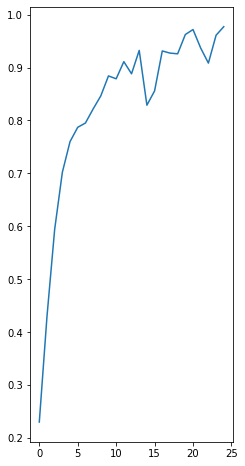

In [58]:
EPOCHS = 25

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Actual Leaf : Other
1/1 [==============================] - 3s 3s/step
Predicted Leaf: Powdery Mildew


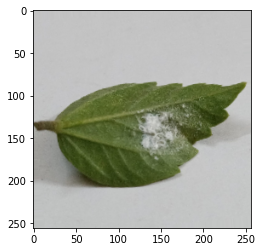

In [59]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    plt.imshow(first_image)
    print("Actual Leaf :",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted Leaf:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [60]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/3\assets


INFO:tensorflow:Assets written to: ../models/3\assets
